Mean Squared Error: 728.5540541978135


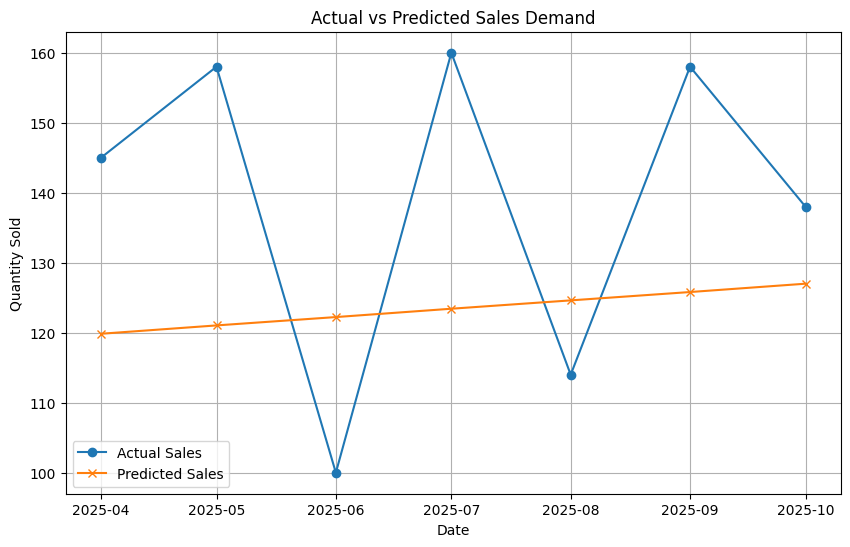

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load the historical data
#data = pd.read_csv('Historical_Sales.csv')
data = pd.read_csv('Historical_Sales1.csv')
df=pd.DataFrame(data)  

# Step 1.5: Data Cleaning (Add these lines)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
# Replace spaces ' ' with NaN values in the entire DataFrame
df = df.replace(' ', np.nan)

# Convert the 'QuantitySold' column to numeric, coercing errors to NaN
# This ensures any remaining non-numeric values are NaNs
df['QuantitySold'] = pd.to_numeric(df['QuantitySold'], errors='coerce')

# Handle missing data: 
# Option A: Drop rows with missing values (recommended if you have enough data)
df.dropna(inplace=True)

# Option B: Fill missing values with the mean of the column (if you don't want to lose rows)
# df['QuantitySold'].fillna(df['QuantitySold'].mean(), inplace=True)

# Step 2: Train-test split
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:] 

# Target variable:QuantitySold
X_train = train_data[["Month", "Year"]]
y_train = train_data["QuantitySold"]
X_test = test_data[["Month", "Year"]]
y_test = test_data["QuantitySold"]

# Step 3: Train the Linear regression model
model = LinearRegression()
model.fit(X_train, y_train) 

# Step 4: Forecast Sales Demand
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 5: Visualization
plt.figure(figsize=(10, 6))
plt.plot(test_data["Date"], y_test, label='Actual Sales', marker='o')
plt.plot(test_data["Date"], y_pred, label='Predicted Sales', marker='x')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Actual vs Predicted Sales Demand')
plt.legend()
plt.grid()
plt.show()  
